In [2]:
%matplotlib inline


Datasets & DataLoaders
===================




PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.


Loading a Dataset
-------------------
PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset: `torchvision.datasets`, `torchtext.datasets` and `torchaudio.datasets`.

Here is an example of how to load the Fashion-MNIST dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=None,
)

In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

In [5]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test

Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



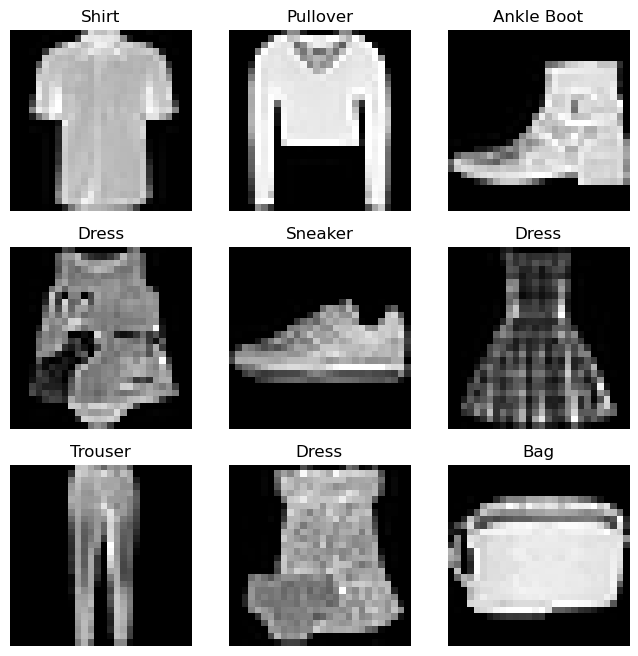

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.


In [7]:
import os
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):  
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = []
        labels = []
        for filename in os.listdir(img_dir):
            filenames.append(filename)
            if filename.startswith("bird"):
                labels.append(0)
            elif filename.startswith("cat"):
                labels.append(1)
            elif filename.startswith("dog"):
                labels.append(2)
        self.filenames = filenames
        self.labels = labels

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.filenames[idx])
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [8]:
from torchvision.transforms import Resize, ToTensor, Compose

pet_dataset = CustomImageDataset("./data/pets", transform = Compose([Resize((32,32)), ToTensor()]))
# pet_dataset = CustomImageDataset("./data/pets", transform = ToTensor()) 

In [9]:
pet_dataset[1]

(tensor([[[0.4431, 0.4471, 0.4431,  ..., 0.2078, 0.1922, 0.1765],
          [0.4745, 0.4745, 0.4588,  ..., 0.2157, 0.1961, 0.1804],
          [0.4667, 0.4588, 0.4431,  ..., 0.2275, 0.2196, 0.2118],
          ...,
          [0.1686, 0.1843, 0.1686,  ..., 0.6078, 0.5961, 0.5882],
          [0.1529, 0.1647, 0.1412,  ..., 0.6392, 0.6314, 0.6235],
          [0.1373, 0.1216, 0.1412,  ..., 0.6431, 0.6314, 0.6235]],
 
         [[0.4863, 0.5020, 0.5137,  ..., 0.2392, 0.2196, 0.2000],
          [0.5020, 0.5137, 0.5137,  ..., 0.2314, 0.2039, 0.1843],
          [0.4863, 0.4941, 0.4863,  ..., 0.2392, 0.2157, 0.1961],
          ...,
          [0.2627, 0.2706, 0.2510,  ..., 0.6157, 0.6078, 0.6000],
          [0.2275, 0.2392, 0.2118,  ..., 0.6510, 0.6431, 0.6353],
          [0.2118, 0.1961, 0.2157,  ..., 0.6549, 0.6431, 0.6353]],
 
         [[0.2078, 0.2196, 0.2235,  ..., 0.0902, 0.0863, 0.0745],
          [0.2314, 0.2392, 0.2392,  ..., 0.0863, 0.0784, 0.0706],
          [0.2431, 0.2471, 0.2392,  ...,

type of the image:  <class 'torch.Tensor'>
label: 0


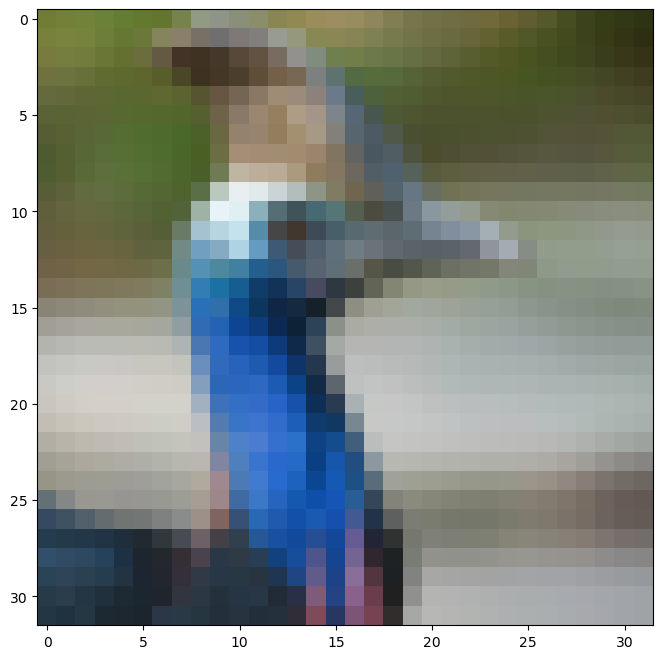

In [10]:
from torchvision.transforms import ToPILImage

raw_image, label = pet_dataset[1]
figure = plt.figure(figsize=(8, 8))
print("type of the image: ", type(raw_image))
if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"label: {label}")

In [11]:
raw_image.shape

torch.Size([3, 32, 32])

Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [12]:
from torch.utils.data import DataLoader

pet_dataloader = DataLoader(pet_dataset, batch_size=12, shuffle=True)

Iterate through the DataLoader
--------------------------

In [13]:
for feature, label in pet_dataloader:
    print(f"Feature batch shape: {feature.size()}")
    print(label)

Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2])
Feature batch shape: torch.Size([12, 3, 32, 32])
tensor([2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2])


Feature batch shape: torch.Size([12, 3, 32, 32])
Labels batch shape: torch.Size([12])


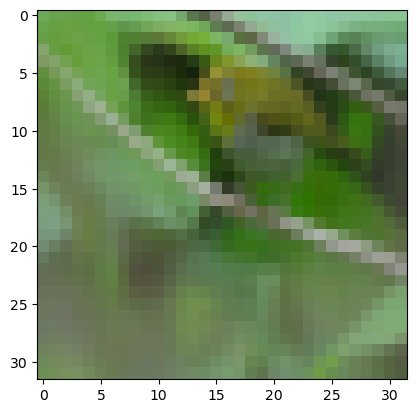

Label: 0


In [14]:
# Display image and label.
train_features, train_labels = next(iter(pet_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = ToPILImage()(train_features[0])
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [15]:
train_features

tensor([[[[0.4235, 0.4039, 0.4078,  ..., 0.5333, 0.5333, 0.5333],
          [0.4039, 0.4000, 0.4118,  ..., 0.4627, 0.4510, 0.4431],
          [0.4078, 0.3922, 0.4157,  ..., 0.4118, 0.4235, 0.4078],
          ...,
          [0.4392, 0.4549, 0.4627,  ..., 0.4235, 0.3843, 0.3647],
          [0.4314, 0.4549, 0.4667,  ..., 0.3569, 0.3373, 0.3294],
          [0.4275, 0.4431, 0.4627,  ..., 0.3529, 0.3333, 0.3176]],

         [[0.6627, 0.6431, 0.6314,  ..., 0.7686, 0.7725, 0.7725],
          [0.6353, 0.6275, 0.6275,  ..., 0.6784, 0.6784, 0.6745],
          [0.6196, 0.6157, 0.6235,  ..., 0.6078, 0.6275, 0.6196],
          ...,
          [0.5098, 0.5176, 0.5176,  ..., 0.5216, 0.4549, 0.4000],
          [0.5373, 0.5373, 0.5373,  ..., 0.4353, 0.3922, 0.3608],
          [0.5608, 0.5608, 0.5686,  ..., 0.4431, 0.4000, 0.3686]],

         [[0.3451, 0.2980, 0.2902,  ..., 0.5922, 0.5804, 0.5765],
          [0.3020, 0.2667, 0.2588,  ..., 0.4863, 0.4745, 0.4667],
          [0.2863, 0.2353, 0.2549,  ..., 0